### Data pREP part 2

Data that we use in this class is from PalmerPenguins Dataset. This dataset has been recently introduced as an alternative to the famous Iris dataset. It is created by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER. You can obtain this dataset here https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data. This dataset is essentially composed of two datasets, each containing data of 344 penguins. Just like in Iris dataset there are 3 different species of penguins coming from 3 islands in the Palmer Archipelago.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
data = pd.read_csv('data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [155]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [156]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Handling Missing Values

https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

In [157]:
print(data.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


**Dropping**

In [158]:
data1 = data.copy()
data1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [159]:
data1.dropna(inplace=True)

In [160]:
print(data1.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


**Imputation**

In [161]:
# fill in
data2 = data.copy()

In [162]:
data2.fillna(0, inplace=True)

In [163]:
print(data2.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [164]:
# Using mean, median or mode
data3 = data.copy()

data3['culmen_length_mm'].fillna((data3['culmen_length_mm'].mean()), inplace=True)
data3['culmen_depth_mm'].fillna((data3['culmen_depth_mm'].median()), inplace=True)
data3['flipper_length_mm'].fillna((data3['flipper_length_mm'].mean()), inplace=True)
data3['body_mass_g'].fillna((data3['body_mass_g'].mean()), inplace=True)

data3['sex'].fillna((data3['sex'].value_counts().index[0]), inplace=True)

In [165]:
print(data3.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [166]:
data3['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [167]:
data3.loc[(data3['sex'] != 'FEMALE') & (data3['sex'] != 'MALE')]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [168]:
data3.drop([336], inplace=True)
data3

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.3,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.000000,FEMALE


### Categorical Encoding

https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

In [169]:
categorical_data = data3.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g'], axis=1)
categorical_data.head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE


In [170]:
# label encoding
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

AttributeError: Can only use .cat accessor with a 'category' dtype

In [171]:
categorical_data["species"] = categorical_data["species"].astype('category')
categorical_data["island"] = categorical_data["island"].astype('category')
categorical_data["sex"] = categorical_data["sex"].astype('category')
categorical_data.dtypes

species    category
island     category
sex        category
dtype: object

In [172]:
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat
0,Adelie,Torgersen,MALE,0,2,1
1,Adelie,Torgersen,FEMALE,0,2,0
2,Adelie,Torgersen,FEMALE,0,2,0
3,Adelie,Torgersen,MALE,0,2,1
4,Adelie,Torgersen,FEMALE,0,2,0


In [173]:
# one-hot encoding
encoded_sex = pd.get_dummies(categorical_data['sex'])

In [174]:
categorical_data = categorical_data.join(encoded_sex)
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat,FEMALE,MALE
0,Adelie,Torgersen,MALE,0,2,1,0,1
1,Adelie,Torgersen,FEMALE,0,2,0,1,0
2,Adelie,Torgersen,FEMALE,0,2,0,1,0
3,Adelie,Torgersen,MALE,0,2,1,0,1
4,Adelie,Torgersen,FEMALE,0,2,0,1,0


### Handling Outliers

* Outliers are values that are deviating from the whole distribution of the data. 
* Sometimes these values are mistakes and wrong measurements and should be removed from datasets,
* Sometimes they are valuable edge-case information.
* This means that sometimes we want to leave these values in the dataset, since they may carry some important information, while other times we want to remove those samples, because of the wrong information.


* we can use the Inter-quartile range to detect these points. Inter-quartile range or IQR indicates where 50 percent of data is located. IQR = Q3 - Q1
* When we are looking for this value we first look for the median, since it splits data into half. 
* Then we are locating the median of the lower end of the data (denoted as Q1) and the median of the higher end of the data (denoted as Q3).
* Data between Q1 and Q3 is the IQR. 
* Outliers are defined as samples that fall below Q1 – 1.5(IQR) or above Q3 + 1.5(IQR). 


We can do this using a boxplot. The purpose of the boxplot is to visualize the distribution. In essence, it includes important points: max value, min value, median, and two IQR points (Q1, Q3). 



https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff#:~:text=Removing%20Outliers%20using%20Standard%20Deviation,is%20Normally%2FGaussian%20distributed).

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

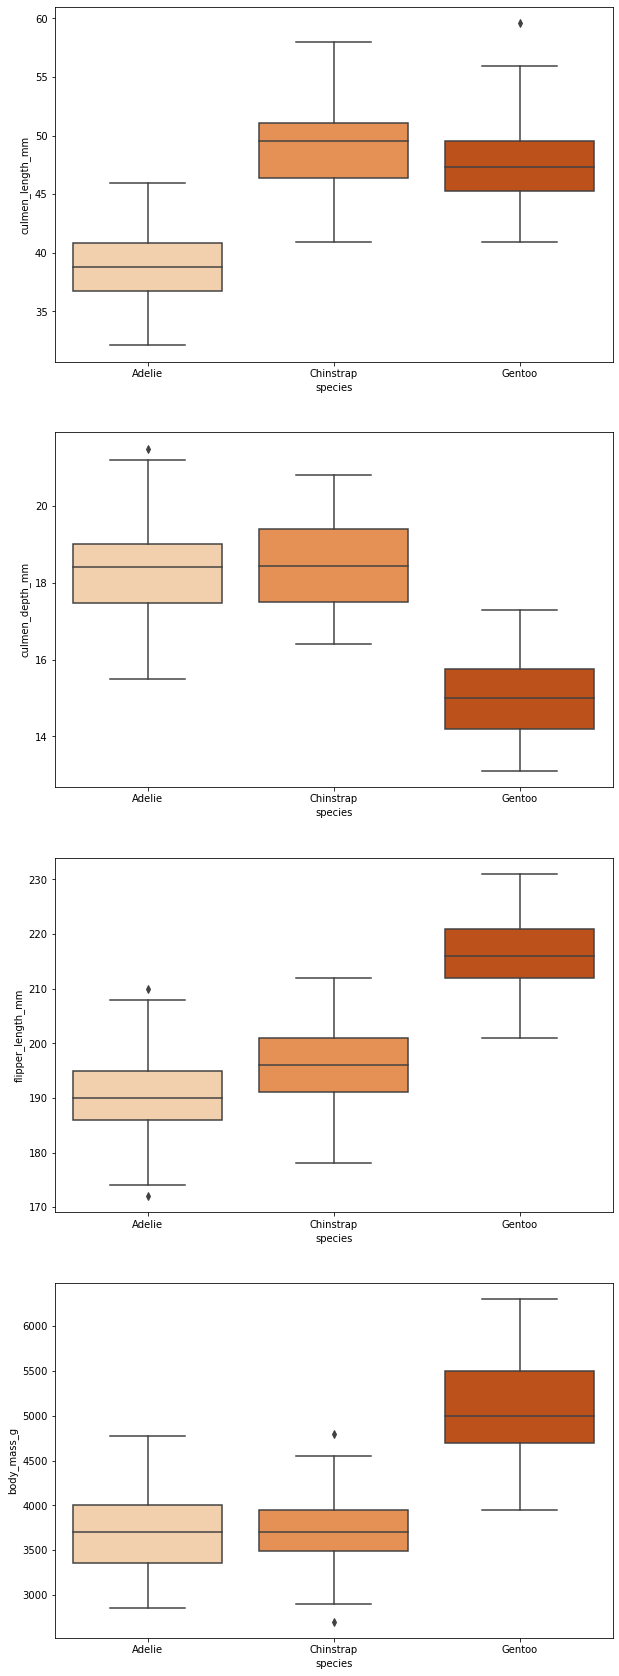

In [175]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data3,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=data3,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=data3,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sb.boxplot(data=data3,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")

In [176]:
upper_lim = data3['culmen_length_mm'].quantile(.95)
lower_lim = data3['culmen_length_mm'].quantile(.05)

no_outliers = data3[(data3['culmen_length_mm'] < upper_lim) & (data3['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.3,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.000000,FEMALE


<AxesSubplot:xlabel='species', ylabel='culmen_length_mm'>

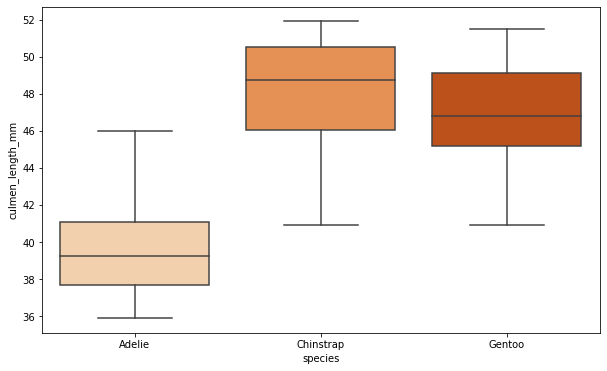

In [177]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 6)
sb.boxplot(data=no_outliers,y="culmen_length_mm",x="species", palette="Oranges")

### Classification Problem


In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad


In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [179]:
ad_data = pd.read_csv('data/advertising.csv')

In [180]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [181]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [182]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [183]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [184]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]

y = ad_data['Clicked on Ad']

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [189]:
predictions = logmodel.predict(X_test)

#### Performance Metrics

https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262#:~:text=The%20precision%20value%20lies%20between,TPR%20(true%20positive%20rate).

In [190]:
from sklearn.metrics import classification_report,confusion_matrix

In [191]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [192]:
print(confusion_matrix(y_test,predictions))

[[149   8]
 [ 14 129]]


### Unsupervised Learning

**Clustering**

In [193]:
# Load Dataset
df = pd.read_csv("data/countries.csv")
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace =True)
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [194]:
from sklearn.cluster import KMeans

In [195]:
# By Assumation we have 7 continents
# k = 7
km = KMeans(n_clusters=7)

In [196]:
# Prep
xfeatures = df[['longitude','latitude']]

In [197]:
# Fit n Predict
clusters = km.fit_predict(xfeatures)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [198]:
# Drop Na
df = df.dropna()

In [199]:
# Prep
xfeatures = df[['longitude','latitude']]

In [200]:
# Fit n Predict
clusters = km.fit_predict(xfeatures)

In [201]:
# Store and Map
df['cluster_continents'] = clusters
df.head(25)

,country,latitude,longitude,name,cluster_continents
0,AD,42.546245,1.601554,Andorra,2
1,AE,23.424076,53.847818,United Arab Emirates,6
2,AF,33.939110,67.709953,Afghanistan,6
3,AG,17.060816,-61.796428,Antigua and Barbuda,1
4,AI,18.220554,-63.068615,Anguilla,1
5,AL,41.153332,20.168331,Albania,2
6,AM,40.069099,45.038189,Armenia,6
7,AN,12.226079,-69.060087,Netherlands Antilles,1
8,AO,-11.202692,17.873887,Angola,0
9,AQ,-75.250973,-0.071389,Antarctica,0


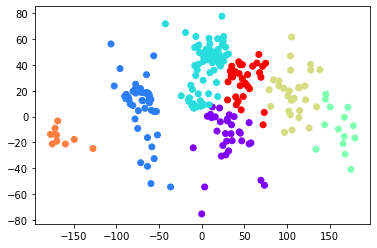

In [202]:
# Plot of our clusters
plt.scatter(df['longitude'],df['latitude'],c=df['cluster_continents'],cmap='rainbow')

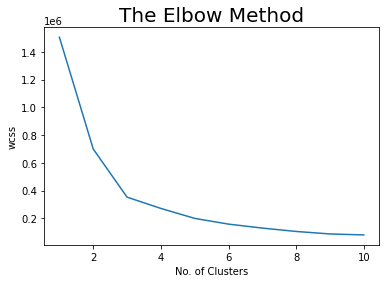

In [203]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(xfeatures)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()